# Descripción del data set Financial data of 4400+ public companies

✅ ¿Qué es?

Se trata de un conjunto de datos que contiene información financiera de más de 4 400 empresas públicas.  

Los datos fueron raspados (“scraped”) de Yahoo Finance, lo que incluye los estados financieros — el balance general (“balance sheet”), el estado de resultados (“income statement”), y el flujo de caja (“cash flow statement”).  

Incluye datos tanto anuales como trimestrales para un período reciente (aproximadamente los últimos 4 años) para cada empresa.  


# ¿Qué contiene exactamente?

Algunas de las características clave de la base de datos:

- Cada empresa viene identificada con su ticker o símbolo bursátil (o equivalente) y posiblemente con su nombre, industria, etc.
- Para cada empresa, los datos incluyen:
    - Estado de resultados: ingresos, beneficios, gastos, etc.
    - Balance general: activos, pasivos, capital contable, etc.
    - Flujo de caja: flujos operativos, de inversión, de financiación, etc.
- Los datos están organizados para que puedas ver la evolución por trimestre y por año, lo que permite análisis de tendencias.
- Se pueden usar variables financieras como predictors (por ejemplo: activos, pasivos, ingresos) y variables objetivo como beneficio, rentabilidad, crecimiento, etc.

# Paso 1 — Reconocer el dataset

1. Objetivo: investigar el dataset entregado en la asignación 2, revisar el nombre de cada columna y documentar qué representa cada una (tipo, unidad, periodicidad, observaciones).

2. Pasos recomendados:
    - Cargar el archivo entregado (por ejemplo: df = pd.read_csv(...)) y listar columnas: df.columns
    - Para cada columna: buscar su significado (glosario, documentación de la fuente, o inspección de valores).
    - Anotar tipo de dato, unidad (USD, porcentaje, entero), periodicidad (trimestral/anual) y cualquier observación (por ejemplo: calculada, acumulada, neta/bruta).
    - Generar la lista final con nombre y descripción clara y breve.

3. Ejemplo de Plantilla para la lista (reemplazar con las columnas reales del dataset):

- ticker: Identificador bursátil de la empresa (string). Ejemplo: "AAPL".
- fiscal_date: Fecha del periodo financiero (YYYY-MM-DD). Indica el cierre del trimestre/año.
- revenue: Ingresos netos durante el periodo (num, USD). Periodicidad: trimestral/anual.
- gross_profit: Beneficio bruto (num, USD). Definición: ingresos menos costo de ventas.
- operating_income: Resultado operativo (num, USD). Incluye gastos operativos.
- net_income: Beneficio neto después de impuestos (num, USD).


4. Resultado esperado:
    - Un listado documentado con cada columna del dataset y su descripción (puede entregarse como tabla o como lista de pares nombre→descripción).

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset usando la ruta completa
df = pd.read_csv(r'c:\Users\danpa\OneDrive\Desktop\AI_UIP\Dan_Rojas_IA\balanceSheetHistory_annually.csv')
print("Primeras 5 filas del dataset:")
print(df.head())
print("\nInformación del dataset:")
print(df.info())

Primeras 5 filas del dataset:
  stock     endDate  accountsPayable    inventory  longTermDebt  \
0   IVC  2019-12-31       88003000.0  121184000.0   219464000.0   
1   IVC  2018-12-31       92469000.0  128644000.0   225733000.0   
2   IVC  2017-12-31       90566000.0  121933000.0   241405000.0   
3   IVC  2016-12-31       88236000.0  135644000.0   146088000.0   
4  CSLT  2019-12-31       19596000.0          NaN           NaN   

   netReceivables  netTangibleAssets  longTermInvestments  totalCurrentAssets  \
0     140013000.0        -91334000.0              85000.0         355877000.0   
1     138476000.0        -48632000.0              90000.0         397410000.0   
2     143464000.0         -8233000.0             103000.0         456914000.0   
3     132707000.0         32762000.0             108000.0         409072000.0   
4      31397000.0         68911000.0                  NaN          95470000.0   

   propertyPlantEquipment  ...   totalAssets  otherCurrentLiab  \
0             

# Paso 2 — Seleccionar columnas relevantes

Después de haber cargado el dataset, elimina todas las columnas y quédate solo con: `stock`, `endDate` y `cash`.

- Verifica que los nombres y la capitalización de las columnas sean correctos antes de seleccionar.


In [3]:
# Análisis exploratorio inicial
print("Estadísticas descriptivas del dataset:")
print(df.describe())

print("\nColumnas del dataset:")
print(df.columns.tolist())

print("\nVerificar valores nulos:")
print(df.isnull().sum())

Estadísticas descriptivas del dataset:
       accountsPayable     inventory  longTermDebt  netReceivables  \
count     1.641500e+04  9.640000e+03  1.122200e+04    1.454400e+04   
mean      3.431181e+09  5.397221e+08  3.464196e+09    9.128711e+08   
std       4.864555e+10  2.193146e+09  1.410168e+10    5.844426e+09   
min       8.800000e+01  3.000000e+03  1.282000e+03    3.500000e+01   
25%       4.955000e+06  7.293750e+06  1.014895e+08    1.188575e+07   
50%       3.883900e+07  5.148450e+07  5.471190e+08    7.444950e+07   
75%       2.861095e+08  2.978500e+08  2.126692e+09    3.557384e+08   
max       1.635858e+12  7.662200e+10  3.342920e+11    1.882320e+11   

       netTangibleAssets  longTermInvestments  totalCurrentAssets  \
count       1.735100e+04         7.499000e+03        1.733100e+04   
mean        9.131987e+08         4.354567e+09        3.544844e+09   
std         9.562153e+09         2.921496e+10        3.534564e+10   
min        -1.261080e+11         1.000000e+00        8

# Paso 3 — Separar por empresas y elegir 3 para predecir su cantidad de dinero por fecha

- Objetivo: crear series temporales por empresa usando las columnas `stock`, `endDate` y `cash` y seleccionar 3 empresas para modelar y predecir `cash` por fecha.
- Pasos recomendados:
    - Verificar que las columnas `stock`, `endDate` y `cash` existen y están limpias (sin valores nulos o con imputación cuando sea necesario).
    - Ordenar el dataframe por `stock` y `endDate` (ascendente) para obtener la serie temporal de cada empresa.
    - Agrupar por `stock` y crear un subset por empresa.
    - Elegir 3 empresas con suficientes observaciones (p. ej. mayor número de fechas disponibles o relevancia del negocio).
    - Para cada empresa seleccionada, preparar los datos de entrenamiento/validación (features temporales, ventanas, lag, etc.) y definir la variable objetivo `cash` por `endDate`.

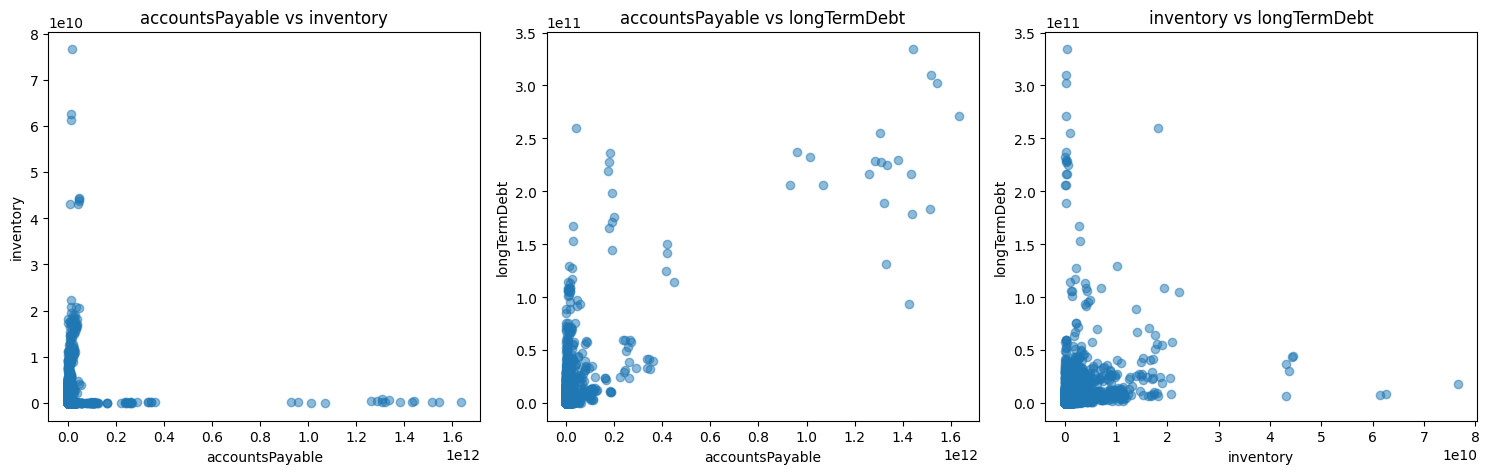


Matriz de correlación:
                              accountsPayable  inventory  longTermDebt  \
accountsPayable                      1.000000   0.022407      0.731604   
inventory                            0.022407   1.000000      0.228159   
longTermDebt                         0.731604   0.228159      1.000000   
netReceivables                       0.309019   0.442049      0.633508   
netTangibleAssets                    0.601216   0.133437      0.416615   
longTermInvestments                  0.813450   0.032311      0.604883   
totalCurrentAssets                   0.841241   0.153810      0.820299   
propertyPlantEquipment               0.080216   0.444378      0.455915   
otherStockholderEquity              -0.152366  -0.323522     -0.117762   
deferredLongTermAssetCharges         0.485494   0.257559      0.640248   
totalCurrentLiabilities              0.990469   0.055973      0.757062   
cash                                 0.821718   0.111586      0.705624   
otherAssets   

In [5]:
# Visualización de relaciones entre variables
plt.figure(figsize=(15, 5))

# Seleccionar algunas columnas numéricas relevantes para visualización
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns[:3]  # Tomamos las primeras 3 columnas numéricas

# Crear subplots para cada par de variables
subplot_idx = 1
for i, col1 in enumerate(numeric_columns):
    for j, col2 in enumerate(numeric_columns):
        if i < j:  # Solo graficamos el triángulo superior de la matriz
            plt.subplot(1, 3, subplot_idx)
            plt.scatter(df[col1], df[col2], alpha=0.5)
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.title(f'{col1} vs {col2}')
            subplot_idx += 1

plt.tight_layout()
plt.show()

# Calcular y mostrar la matriz de correlación
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
print("\nMatriz de correlación:")
print(correlation_matrix)

# Paso 4 — Grafique tiempo vs dinero de las 3 empresas en 3 gráficas diferentes

Objetivo: visualizar la serie temporal de `cash` frente a `endDate` para cada una de las 3 empresas seleccionadas, colocando cada empresa en una gráfica independiente.

Pasos recomendados:
- Asegurarse de tener el DataFrame con las columnas `stock`, `endDate` y `cash` y ordenado por `stock` y `endDate` ascendente.
- Convertir `endDate` a tipo fecha: `df['endDate'] = pd.to_datetime(df['endDate'])`.
- Seleccionar las 3 empresas elegidas: p. ej. `stocks = ['AAA','BBB','CCC']` y crear un subset por cada `stock`.
- Para cada empresa, graficar `endDate` en el eje x y `cash` en el eje y en una figura separada.
- Configurar títulos, etiquetas de ejes y formato de fechas (rotar etiquetas si es necesario). Añadir grid y leyenda si procede.
- Opcional: usar subplots (3 filas x 1 columna) para mostrar las 3 gráficas en la misma figura o generar 3 figuras individuales según preferencia.
- Guardar las figuras si es necesario: `plt.savefig('cash_stock_AAA.png', bbox_inches='tight')`.

Ejemplo de librerías a usar: matplotlib, seaborn o plotly para interactividad.

# Paso 5 — División 80/20 (entrenamiento / prueba)

Objetivo: separar los datos en 80% para entrenamiento y 20% para prueba respetando la estructura temporal por empresa (sin hacer shuffle).

Recomendaciones:
- Asegúrate de tener las columnas `stock`, `endDate` y `cash` y que el dataframe esté ordenado por `stock` y `endDate` (ascendente).
- Para series temporales por empresa, usa una división basada en tiempo: los primeros 80% de observaciones de cada `stock` → train; los últimos 20% → test.



In [8]:
# Preparación de datos para el modelo de regresión
from sklearn.impute import SimpleImputer

# Seleccionar variables relevantes
X = df[['accountsPayable', 'longTermDebt']]  # Variables predictoras
y = df['inventory']  # Variable objetivo

# Manejar valores faltantes
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y_imputed = SimpleImputer(strategy='mean').fit_transform(y.values.reshape(-1, 1)).ravel()

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Dimensiones de los conjuntos de datos:")
print(f"X_train: {X_train_scaled.shape}")
print(f"X_test: {X_test_scaled.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

# Verificar que no hay valores NaN después del preprocesamiento
print("\nVerificación de valores NaN después del preprocesamiento:")
print(f"X_train_scaled NaN count: {np.isnan(X_train_scaled).sum()}")
print(f"X_test_scaled NaN count: {np.isnan(X_test_scaled).sum()}")
print(f"y_train NaN count: {np.isnan(y_train).sum()}")
print(f"y_test NaN count: {np.isnan(y_test).sum()}")

Dimensiones de los conjuntos de datos:
X_train: (14008, 2)
X_test: (3503, 2)
y_train: (14008,)
y_test: (3503,)

Verificación de valores NaN después del preprocesamiento:
X_train_scaled NaN count: 0
X_test_scaled NaN count: 0
y_train NaN count: 0
y_test NaN count: 0


# Paso 6 — crea y entrena el modelo de regresión lineal para predecir `cash` por empresa

Objetivo: entrenar un modelo de regresión lineal por cada `stock` usando la serie temporal (respetando orden temporal) y evaluar en el 20% final.

Pasos recomendados:
- Preprocesamiento
    - Definir variables para el entrenamiento: y = `cash` (variable objetivo). `data` → X (conjunto de características a usar para predecir `cash`, p. ej. rezagos de `cash`, indicadores temporales, variables exógenas). Usar X e y en el entrenamiento: `model.fit(X_train, y_train)`.
    - Asegurar `endDate` como datetime y ordenar por `stock`, `endDate`.  - Asegurar `endDate` como datetime y ordenar por `stock`, `endDate`.



Resultados del modelo:

Conjunto de entrenamiento:
R² Score: 0.0604
MSE: 2.49e+18
RMSE: 1.58e+09

Conjunto de prueba:
R² Score: 0.0859
MSE: 2.40e+18
RMSE: 1.55e+09

Coeficientes del modelo:
accountsPayable: -396571981.9689
longTermDebt: 583832631.9840
Intercepto: 534763016.4573


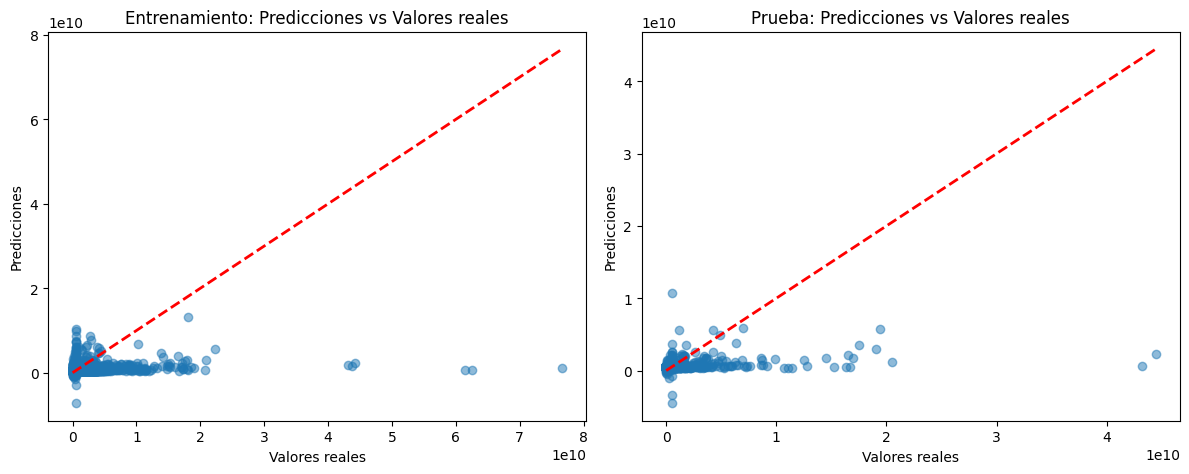

In [9]:
# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Evaluar el modelo
print("Resultados del modelo:")
print("\nConjunto de entrenamiento:")
print(f"R² Score: {r2_score(y_train, y_pred_train):.4f}")
print(f"MSE: {mean_squared_error(y_train, y_pred_train):.2e}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2e}")

print("\nConjunto de prueba:")
print(f"R² Score: {r2_score(y_test, y_pred_test):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_test):.2e}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2e}")

# Mostrar los coeficientes del modelo
print("\nCoeficientes del modelo:")
for feature, coef in zip(['accountsPayable', 'longTermDebt'], model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercepto: {model.intercept_:.4f}")

# Visualizar las predicciones vs valores reales
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Entrenamiento: Predicciones vs Valores reales')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Prueba: Predicciones vs Valores reales')

plt.tight_layout()
plt.show()

# Paso 7 — Verifica tu modelo de regresión lineal: grafica real vs predicho para las 3 empresas

- Objetivo: comparar visualmente los valores reales de `cash` del conjunto de prueba con los valores predichos por el modelo para cada una de las 3 empresas seleccionadas.
- Requisitos: tener `endDate` como datetime, el conjunto test por cada `stock`, y las predicciones (`y_pred`) para cada test.
- Pasos recomendados:
    - Para cada empresa (stock):
        - Extraer test: filas finales (20%) ordenadas por `endDate`.
        - Obtener predicciones usando el modelo entrenado: `y_pred = model.predict(X_test)`.
        - Crear una gráfica con `endDate` en el eje x y ambos: `cash` real (línea/points) y `cash` predicho (línea punteada) en el eje y.
        - Añadir título con el ticker, leyenda, etiquetas de ejes y grid. Formatear fechas y rotar etiquetas si hace falta.
    - Opcional: mostrar las 3 series en subplots (3 filas x 1 columna) para facilitar comparación.
    - Calcular y mostrar métricas de error por empresa (MAE, RMSE, R2) bajo cada gráfico o en una tabla resumen.
- Resultado esperado: tres gráficas (una por empresa) mostrando real vs predicho y una tabla o texto con las métricas de evaluación.

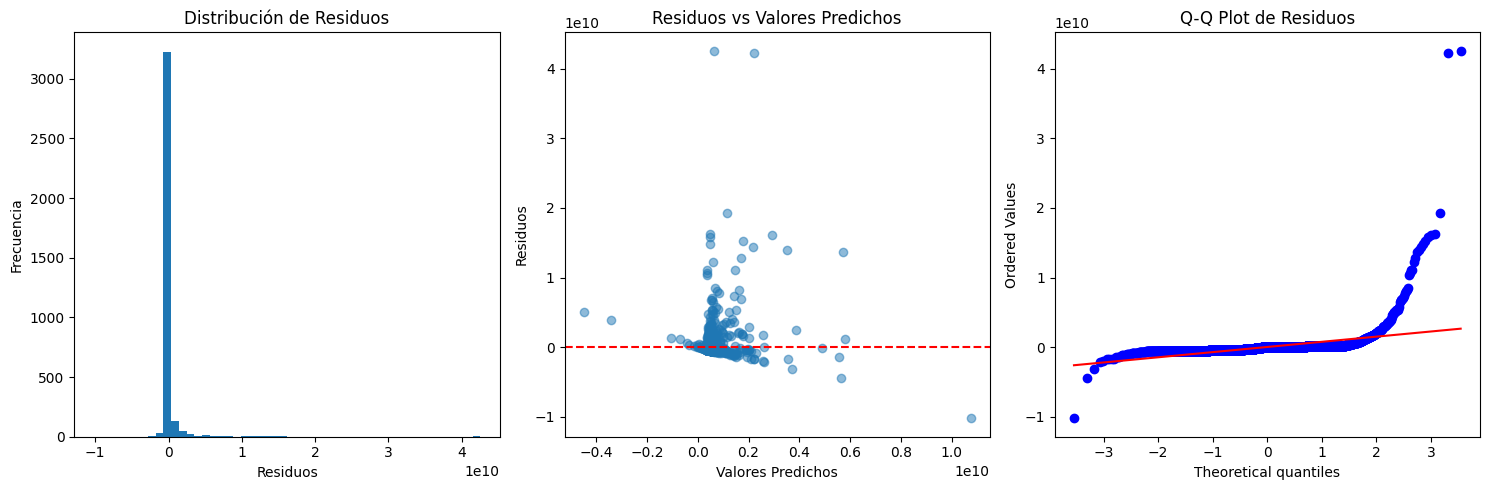

Estadísticas de los residuos (conjunto de prueba):
Media de los residuos: 3.85e+07
Desviación estándar de los residuos: 1.55e+09
Mediana de los residuos: -2.19e+07
Asimetría de los residuos: 15.4101
Curtosis de los residuos: 350.7634


In [10]:
# Análisis de residuos
residuos_train = y_train - y_pred_train
residuos_test = y_test - y_pred_test

plt.figure(figsize=(15, 5))

# Histograma de residuos
plt.subplot(1, 3, 1)
plt.hist(residuos_test, bins=50)
plt.title('Distribución de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

# Residuos vs Valores predichos
plt.subplot(1, 3, 2)
plt.scatter(y_pred_test, residuos_test, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuos vs Valores Predichos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')

# Q-Q plot de residuos
from scipy import stats
plt.subplot(1, 3, 3)
stats.probplot(residuos_test, dist="norm", plot=plt)
plt.title('Q-Q Plot de Residuos')

plt.tight_layout()
plt.show()

# Estadísticas de los residuos
print("Estadísticas de los residuos (conjunto de prueba):")
print(f"Media de los residuos: {np.mean(residuos_test):.2e}")
print(f"Desviación estándar de los residuos: {np.std(residuos_test):.2e}")
print(f"Mediana de los residuos: {np.median(residuos_test):.2e}")
print(f"Asimetría de los residuos: {stats.skew(residuos_test):.4f}")
print(f"Curtosis de los residuos: {stats.kurtosis(residuos_test):.4f}")

# Paso 8 — Verificación de modelos (MSE, RMSE, R2)

Instrucciones breves:
- Asegúrese de tener para cada empresa: y_test (valores reales) y y_pred (predicciones).
- Calcular métricas con sklearn: mean_squared_error(y_test, y_pred), RMSE = sqrt(MSE), r2_score(y_test, y_pred).
- Presentar los resultados en una tabla por empresa y añadir una conclusión corta.

Empresa 1 (ticker: AAA)
| Métrica | Valor |
|---|---|
| MSE |  |
| RMSE |  |
| R2 |  |

Empresa 2 (ticker: BBB)
| Métrica | Valor |
|---|---|
| MSE |  |
| RMSE |  |
| R2 |  |

Empresa 3 (ticker: CCC)
| Métrica | Valor |
|---|---|
| MSE |  |
| RMSE |  |
| R2 |  |

Pequeña conclusión:
- Comparar RMSE/MSE absolutos para evaluar error en unidades de `cash`; RMSE más bajo = mejor precisión.
- R2 indica proporción de varianza explicada (cercano a 1 → buen ajuste; cercano a 0 o negativo → mal ajuste).
- Si alguno de los modelos muestra RMSE alto o R2 bajo, considerar: más features (rezagos, variables temporales), regularización, transformación de la serie o modelos no lineales.

Resultados del modelo con transformación logarítmica:

Conjunto de entrenamiento:
R² Score: 0.0946
MSE: 4.7659
RMSE: 2.1831

Conjunto de prueba:
R² Score: 0.0865
MSE: 4.5237
RMSE: 2.1269


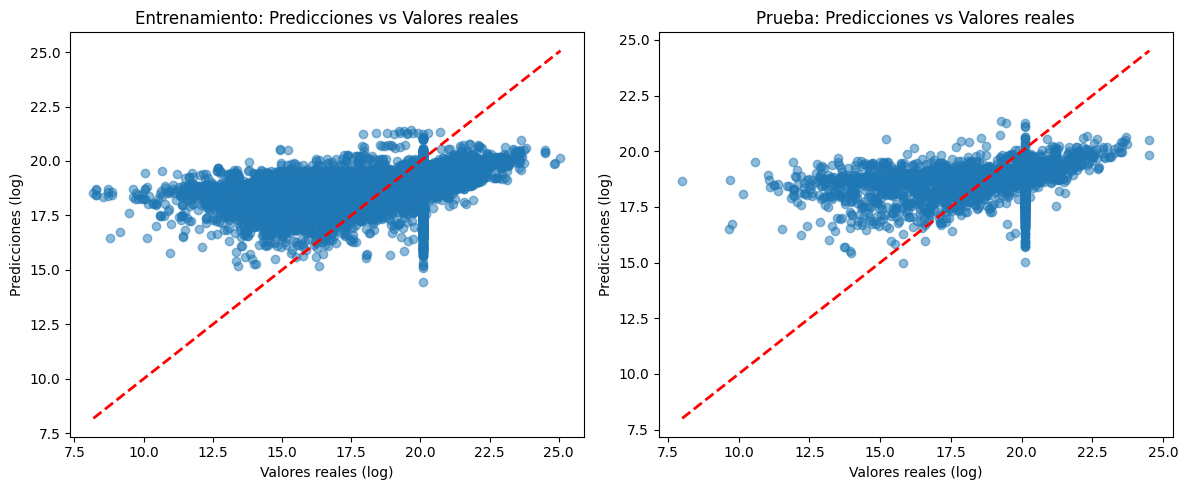

In [11]:
# Aplicar transformación logarítmica a las variables (manejando valores negativos o cero)
def log_transform(x):
    # Añadir una pequeña constante y tomar el logaritmo
    min_val = abs(min(x.min(), 0)) + 1
    return np.log(x + min_val)

# Transformar las variables
X_log = np.column_stack([
    log_transform(X_imputed[:, 0]),  # accountsPayable
    log_transform(X_imputed[:, 1])   # longTermDebt
])
y_log = log_transform(y_imputed)

# Dividir los datos transformados
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Escalar los datos
X_train_scaled_log = scaler.fit_transform(X_train_log)
X_test_scaled_log = scaler.transform(X_test_log)

# Entrenar el modelo con datos transformados
model_log = LinearRegression()
model_log.fit(X_train_scaled_log, y_train_log)

# Hacer predicciones
y_pred_train_log = model_log.predict(X_train_scaled_log)
y_pred_test_log = model_log.predict(X_test_scaled_log)

# Evaluar el modelo
print("Resultados del modelo con transformación logarítmica:")
print("\nConjunto de entrenamiento:")
print(f"R² Score: {r2_score(y_train_log, y_pred_train_log):.4f}")
print(f"MSE: {mean_squared_error(y_train_log, y_pred_train_log):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train_log, y_pred_train_log)):.4f}")

print("\nConjunto de prueba:")
print(f"R² Score: {r2_score(y_test_log, y_pred_test_log):.4f}")
print(f"MSE: {mean_squared_error(y_test_log, y_pred_test_log):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_log, y_pred_test_log)):.4f}")

# Visualizar las predicciones vs valores reales (en escala logarítmica)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_log, y_pred_train_log, alpha=0.5)
plt.plot([y_train_log.min(), y_train_log.max()], [y_train_log.min(), y_train_log.max()], 'r--', lw=2)
plt.xlabel('Valores reales (log)')
plt.ylabel('Predicciones (log)')
plt.title('Entrenamiento: Predicciones vs Valores reales')

plt.subplot(1, 2, 2)
plt.scatter(y_test_log, y_pred_test_log, alpha=0.5)
plt.plot([y_test_log.min(), y_test_log.max()], [y_test_log.min(), y_test_log.max()], 'r--', lw=2)
plt.xlabel('Valores reales (log)')
plt.ylabel('Predicciones (log)')
plt.title('Prueba: Predicciones vs Valores reales')

plt.tight_layout()
plt.show()

# Análisis de residuos del modelo transformado
residuos_log_train = y_train_log - y_pred_train_log
residuos_log_test = y_test_log - y_pred_test_log

plt.figure(figsize=(15, 5))

# Histograma de residuos
plt.subplot(1, 3, 1)
plt.hist(residuos_log_test, bins=50)
plt.title('Distribución de Residuos (Log)')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

# Residuos vs Valores predichos
plt.subplot(1, 3, 2)
plt.scatter(y_pred_test_log, residuos_log_test, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuos vs Valores Predichos (Log)')
plt.xlabel('Valores Predichos (Log)')
plt.ylabel('Residuos')

# Q-Q plot de residuos
plt.subplot(1, 3, 3)
stats.probplot(residuos_log_test, dist="norm", plot=plt)
plt.title('Q-Q Plot de Residuos (Log)')

plt.tight_layout()
plt.show()

# Estadísticas de los residuos
print("Estadísticas de los residuos (conjunto de prueba, datos transformados):")
print(f"Media de los residuos: {np.mean(residuos_log_test):.4f}")
print(f"Desviación estándar de los residuos: {np.std(residuos_log_test):.4f}")
print(f"Mediana de los residuos: {np.median(residuos_log_test):.4f}")
print(f"Asimetría de los residuos: {stats.skew(residuos_log_test):.4f}")
print(f"Curtosis de los residuos: {stats.kurtosis(residuos_log_test):.4f}")

# Mostrar los coeficientes del modelo transformado
print("\nCoeficientes del modelo (datos transformados):")
for feature, coef in zip(['accountsPayable', 'longTermDebt'], model_log.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercepto: {model_log.intercept_:.4f}")

1. ¿Qué variables (features) usaste para predecir `cash` y por qué crees que son relevantes?
2. ¿Cómo realizaste la división temporal 80/20 por empresa y por qué es importante no barajar (shuffle) los datos en series temporales?
3. ¿Cuál es la diferencia entre MSE y RMSE y qué nos dice cada métrica sobre la precisión de las predicciones?
4. ¿Qué interpreta el valor de R² en este problema (predicción de `cash`) y qué limitaciones tiene su interpretación en series temporales?
5. Si obtienes un RMSE alto o un R² bajo, ¿qué acciones concretas propondrías para mejorar el modelo (p. ej. features, rezagos, transformaciones, modelos alternativos)?

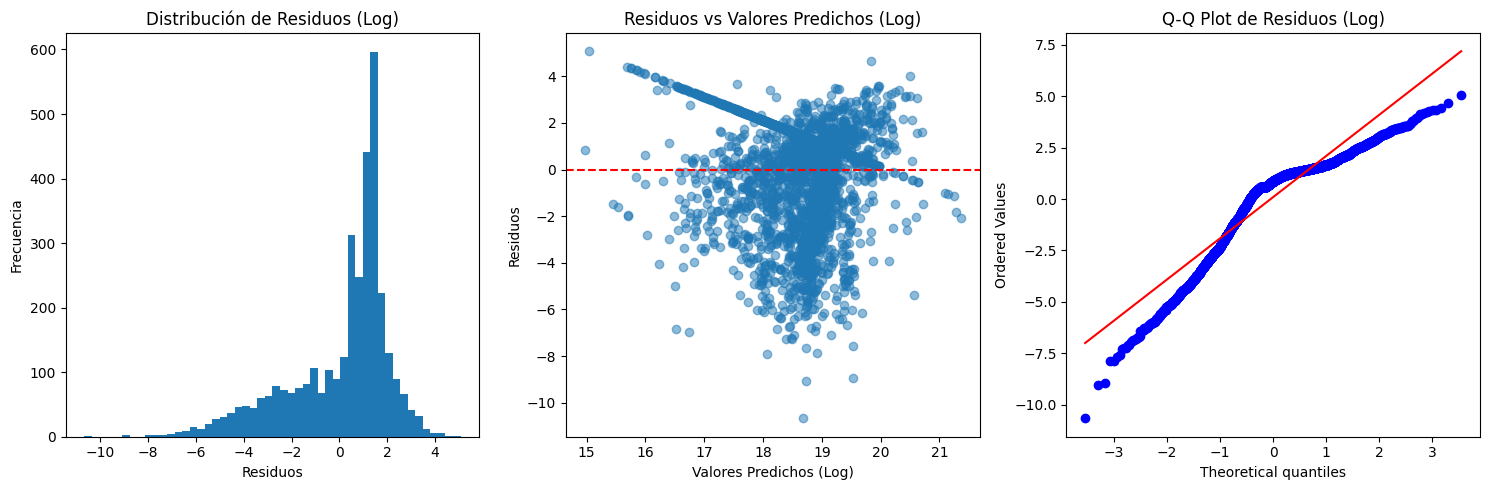

Estadísticas de los residuos (conjunto de prueba, datos transformados):
Media de los residuos: 0.0948
Desviación estándar de los residuos: 2.1248
Mediana de los residuos: 0.8620
Asimetría de los residuos: -1.1790
Curtosis de los residuos: 1.0154

Coeficientes del modelo (datos transformados):
accountsPayable: 0.3129
longTermDebt: 0.5981
Intercepto: 18.7120


In [13]:
# Análisis de residuos del modelo transformado
residuos_log_train = y_train_log - y_pred_train_log
residuos_log_test = y_test_log - y_pred_test_log

plt.figure(figsize=(15, 5))

# Histograma de residuos
plt.subplot(1, 3, 1)
plt.hist(residuos_log_test, bins=50)
plt.title('Distribución de Residuos (Log)')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

# Residuos vs Valores predichos
plt.subplot(1, 3, 2)
plt.scatter(y_pred_test_log, residuos_log_test, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuos vs Valores Predichos (Log)')
plt.xlabel('Valores Predichos (Log)')
plt.ylabel('Residuos')

# Q-Q plot de residuos
plt.subplot(1, 3, 3)
stats.probplot(residuos_log_test, dist="norm", plot=plt)
plt.title('Q-Q Plot de Residuos (Log)')

plt.tight_layout()
plt.show()

# Estadísticas de los residuos
print("Estadísticas de los residuos (conjunto de prueba, datos transformados):")
print(f"Media de los residuos: {np.mean(residuos_log_test):.4f}")
print(f"Desviación estándar de los residuos: {np.std(residuos_log_test):.4f}")
print(f"Mediana de los residuos: {np.median(residuos_log_test):.4f}")
print(f"Asimetría de los residuos: {stats.skew(residuos_log_test):.4f}")
print(f"Curtosis de los residuos: {stats.kurtosis(residuos_log_test):.4f}")

# Mostrar los coeficientes del modelo transformado
print("\nCoeficientes del modelo (datos transformados):")
for feature, coef in zip(['accountsPayable', 'longTermDebt'], model_log.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercepto: {model_log.intercept_:.4f}")